In [ ]:

import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,LSTM,Activation,Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from numpy import newaxis
import math
import json
#import tensorflowjs as tfjs
import math
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error

In [ ]:
!pip install pmdarima


     |████████████████████████████████| 1.5MB 16.2MB/s 
     |████████████████████████████████| 9.5MB 49.8MB/s 
     |████████████████████████████████| 2.1MB 49.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
stock = pd.read_csv('/content/^BSESN.csv')
print(stock.head())
print(stock.shape)

         Date          Open          High  ...         Close     Adj Close   Volume
0  2015-01-02  27521.279297  27937.470703  ...  27887.900391  27887.900391   7400.0
1  2015-01-05  27978.429688  28064.490234  ...  27842.320313  27842.320313   9200.0
2  2015-01-06  27694.230469  27698.929688  ...  26987.460938  26987.460938  14100.0
3  2015-01-07  26983.429688  27051.599609  ...  26908.820313  26908.820313  12200.0
4  2015-01-08  27178.769531  27316.410156  ...  27274.710938  27274.710938   8200.0

[5 rows x 7 columns]
(1361, 7)


In [ ]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1361 non-null   datetime64[ns]
 1   Open       1356 non-null   float64       
 2   High       1356 non-null   float64       
 3   Low        1356 non-null   float64       
 4   Close      1356 non-null   float64       
 5   Adj Close  1356 non-null   float64       
 6   Volume     1356 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 74.6 KB


In [ ]:
stock.dropna(inplace = True)

In [ ]:
df2=stock

Text(0, 0.5, 'Close')

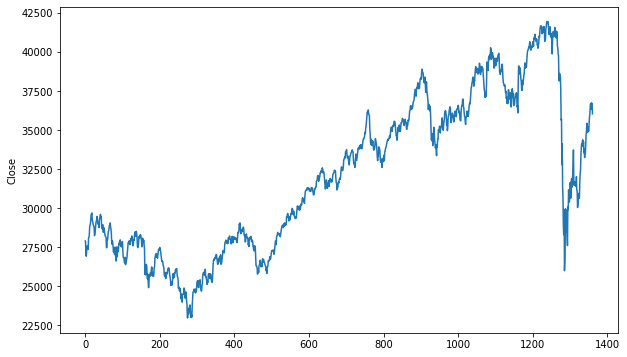

In [ ]:
plt.figure(figsize=(10, 6))
stock['Close'].plot()
plt.ylabel('Close')

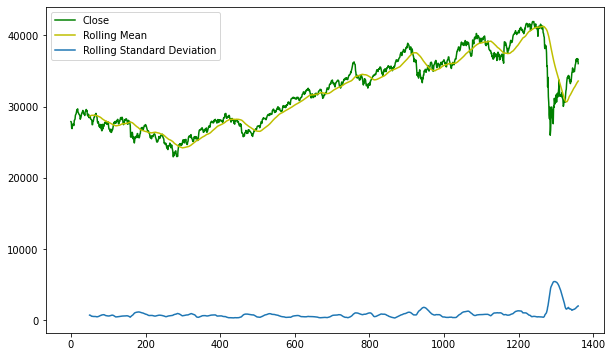

In [ ]:
#Plotting moving average
close = stock['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
stock['Close'].plot(color = 'g', label = 'Close')
ma.plot(color = 'y', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

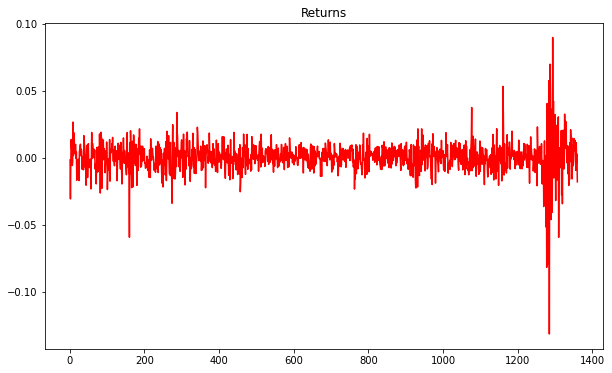

In [ ]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'r')
plt.title("Returns")

In [ ]:
train = stock[:1000]
test = stock[1000:]

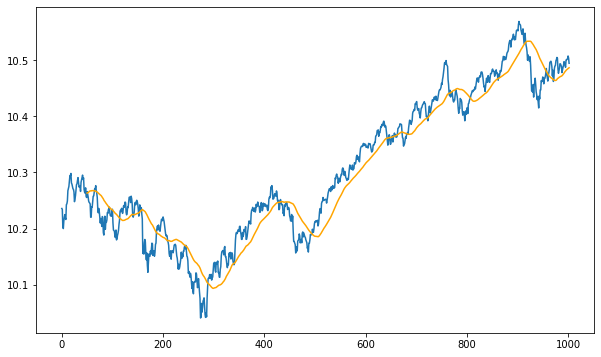

In [ ]:

train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(50).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'orange')

In [ ]:
train.drop(['Date'], axis = 1, inplace = True) 
test.drop(['Date'], axis = 1, inplace = True)

In [ ]:
train

,Open,High,Low,Close,Adj Close,Volume
0,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400.0
1,27978.429688,28064.490234,27786.849609,27842.320313,27842.320313,9200.0
2,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100.0
3,26983.429688,27051.599609,26776.119141,26908.820313,26908.820313,12200.0
4,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200.0
...,...,...,...,...,...,...
998,36413.601563,36468.421875,36170.800781,36374.078125,36374.078125,20500.0
999,36417.578125,36469.980469,36218.328125,36386.609375,36386.609375,20800.0
1000,36467.121094,36701.031250,36351.769531,36578.960938,36578.960938,18700.0
1001,36649.921875,36650.468750,36282.929688,36444.640625,36444.640625,17300.0


In [ ]:
test

,Open,High,Low,Close,Adj Close,Volume
1003,36146.550781,36258.281250,35996.679688,36195.101563,36195.101563,23100.0
1004,36245.769531,36474.480469,35953.148438,36025.539063,36025.539063,23000.0
1005,36099.621094,36124.261719,35565.148438,35656.699219,35656.699219,15000.0
1006,35716.718750,35734.140625,35375.511719,35592.500000,35592.500000,16670300.0
1007,35819.671875,35850.410156,35490.968750,35591.250000,35591.250000,18974200.0
...,...,...,...,...,...,...
1356,36738.378906,36828.429688,36234.171875,36329.011719,36329.011719,24800.0
1357,36450.691406,36806.300781,36422.300781,36737.691406,36737.691406,17400.0
1358,36555.128906,36748.890625,36401.109375,36594.328125,36594.328125,20900.0
1359,36880.660156,37024.199219,36533.960938,36693.691406,36693.691406,16500.0


In [ ]:
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6695.838, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6700.141, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6701.586, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6701.681, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6701.204, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6700.257, Time=0.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6699.799, Time=0.71 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6697.783, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6702.851, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6701.366, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6700.941, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6702.758, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-6698.902, Time=0.45 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.732 seconds


Text(0, 0.5, 'Actual Stock Price')

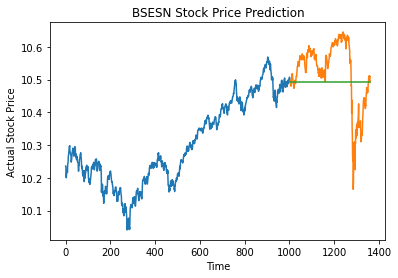

In [ ]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [ ]:
#Calculating error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.10028841890731799


# Textual Analysis


In [ ]:
cols = ['Date','Category','News']
news_data = pd.read_csv('/content/india-news-headlines.csv', names = cols)
news_data

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
...,...,...,...
3297168,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297169,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297170,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297171,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [ ]:
news_data.drop(0, inplace=True)

news_data.drop('Category', axis = 1, inplace=True)
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 75.5+ MB


In [ ]:
news_data['Date'] = pd.to_datetime(news_data['Date'],format= '%Y%m%d')
news_data

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297168,2020-06-30,why tiktok removed 1 65 crore videos in india
3297169,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297170,2020-06-30,kangana ranaut gets a doll version of herself ...
3297171,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [ ]:
df5=news_data

In [ ]:
news_data

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297168,2020-06-30,why tiktok removed 1 65 crore videos in india
3297169,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297170,2020-06-30,kangana ranaut gets a doll version of herself ...
3297171,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [ ]:
news_data['News'] = news_data.groupby(['Date']).transform(lambda x : ' '.join(x)) 

In [ ]:
news_data = news_data.drop_duplicates() 
news_data.reset_index(inplace = True, drop = True)
news_data

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [ ]:
news_data['News']


0       win over cena satisfying but defeating underta...
1       Status quo will not be disturbed at Ayodhya; s...
2       Powerless north India gropes in the dark Think...
3       The string that pulled Stephen Hawking to Indi...
4       Light combat craft takes India into club class...
                              ...                        
7075    Containment zone residents slam high prices ch...
7076    like me i wont let you have a toxic relationsh...
7077    Atanu Ghosh plans to rewrite old scripts to ma...
7078    6 hot and stylish bikini looks of Katrina Kaif...
7079    Detective Byomkesh Bakshy! Edge of Tomorrow Fi...
Name: News, Length: 7080, dtype: object

In [ ]:
ps=PorterStemmer()

In [ ]:
c = []
for i in range(0,len(news_data['News'])):
    news = re.sub('[^a-zA-Z]',' ',news_data['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)

In [ ]:
news_data['News'] = pd.Series(c)
news_data

,Date,News
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
2,2001-01-03,powerless north india grope dark think laxman ...
3,2001-01-04,string pull stephen hawk india vajpaye give bi...
4,2001-01-05,light combat craft take india club class hawk ...
...,...,...
7075,2020-06-26,contain zone resid slam high price charg veget...
7076,2020-06-27,like wont let toxic relationship food major ra...
7077,2020-06-28,atanu ghosh plan rewrit old script make relev ...
7078,2020-06-29,hot stylish bikini look katrina kaif anna eden...


In [ ]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
news_data['Subjectivity'] = news_data['News'].apply(getSubjectivity)
news_data['Polarity'] = news_data['News'].apply(getPolarity)
news_data

,Date,News,Subjectivity,Polarity
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404
...,...,...,...,...
7075,2020-06-26,contain zone resid slam high price charg veget...,0.330257,0.066958
7076,2020-06-27,like wont let toxic relationship food major ra...,0.372264,0.064784
7077,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.378165,0.054209
7078,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782


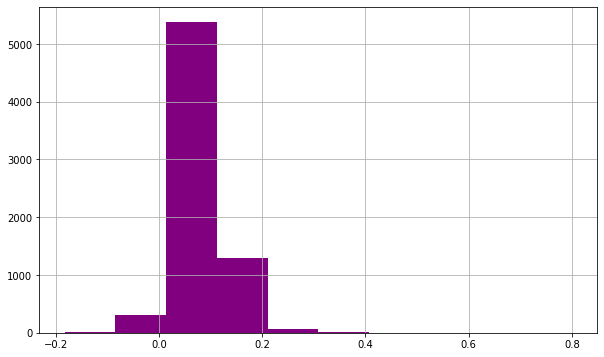

In [ ]:

plt.figure(figsize = (10,6))
news_data['Polarity'].hist(color = 'purple')

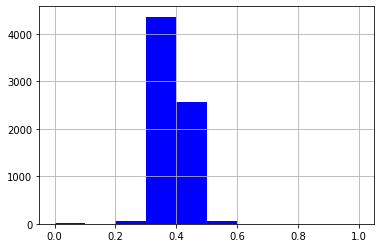

In [ ]:
news_data['Subjectivity'].hist(color = 'blue')

In [ ]:
sia = SentimentIntensityAnalyzer()

news_data['Compound'] = [sia.polarity_scores(v)['compound'] for v in news_data['News']]
news_data['Negative'] = [sia.polarity_scores(v)['neg'] for v in news_data['News']]
news_data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news_data['News']]
news_data['Positive'] = [sia.polarity_scores(v)['pos'] for v in news_data['News']]
news_data

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000,0.2023,0.234,0.469,0.297
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
...,...,...,...,...,...,...,...,...
7075,2020-06-26,contain zone resid slam high price charg veget...,0.330257,0.066958,-0.9998,0.142,0.789,0.069
7076,2020-06-27,like wont let toxic relationship food major ra...,0.372264,0.064784,-0.9998,0.139,0.790,0.070
7077,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.378165,0.054209,-0.9998,0.136,0.800,0.064
7078,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782,-0.9998,0.130,0.800,0.070


In [ ]:
df_merge = pd.merge(df2, news_data, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400.0,drink smart parti tip say sorri kid take child...,0.427002,0.059439,-0.9991,0.128,0.768,0.103
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320313,27842.320313,9200.0,recip strawberri cupcak recip kaju jeera rice ...,0.409543,0.119753,-0.9989,0.122,0.781,0.097
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100.0,turn garden happi teeth jewelleri latest trend...,0.386223,0.046943,-0.9998,0.133,0.790,0.077
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820313,26908.820313,12200.0,ex lover friend water diet bad tip stay happi ...,0.386953,0.032975,-0.9999,0.154,0.765,0.081
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200.0,home manicur recip spice beetroot disinfect wa...,0.387770,0.076619,-0.9998,0.131,0.788,0.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,never thought voic today vidya rajput never th...,0.368654,0.077799,-0.9997,0.126,0.807,0.067
1342,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,truck firm look new export market sell bs rang...,0.362784,0.011935,-0.9999,0.153,0.795,0.052
1343,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,contain zone resid slam high price charg veget...,0.330257,0.066958,-0.9998,0.142,0.789,0.069
1344,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782,-0.9998,0.130,0.800,0.070


In [ ]:
df3 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df3


,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,27887.900391,0.427002,0.059439,-0.9991,0.128,0.768,0.103
1,27842.320313,0.409543,0.119753,-0.9989,0.122,0.781,0.097
2,26987.460938,0.386223,0.046943,-0.9998,0.133,0.790,0.077
3,26908.820313,0.386953,0.032975,-0.9999,0.154,0.765,0.081
4,27274.710938,0.387770,0.076619,-0.9998,0.131,0.788,0.080
...,...,...,...,...,...,...,...
1341,34868.980469,0.368654,0.077799,-0.9997,0.126,0.807,0.067
1342,34842.101563,0.362784,0.011935,-0.9999,0.153,0.795,0.052
1343,35171.269531,0.330257,0.066958,-0.9998,0.142,0.789,0.069
1344,34961.519531,0.373210,0.060782,-0.9998,0.130,0.800,0.070


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df3))
new_df.columns = df3.columns
new_df.index = df3.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.259782,0.492897,0.228278,0.00045,0.411765,0.336134,0.533981
1,0.257383,0.415774,0.417200,0.00055,0.352941,0.445378,0.475728
2,0.212393,0.312762,0.189137,0.00010,0.460784,0.521008,0.281553
3,0.208254,0.315989,0.145385,0.00005,0.666667,0.310924,0.320388
4,0.227510,0.319599,0.282091,0.00010,0.441176,0.504202,0.310680


In [ ]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [ ]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.492897,0.228278,0.00045,0.411765,0.336134,0.533981
1,0.415774,0.417200,0.00055,0.352941,0.445378,0.475728
2,0.312762,0.189137,0.00010,0.460784,0.521008,0.281553
3,0.315989,0.145385,0.00005,0.666667,0.310924,0.320388
4,0.319599,0.282091,0.00010,0.441176,0.504202,0.310680


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(1076, 6)

In [ ]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
319,0.360577,0.405158,0.000050,0.617647,0.352941,0.330097
565,0.269052,0.364814,0.000150,0.509804,0.277311,0.514563
445,0.141201,0.305165,0.000050,0.656863,0.260504,0.398058
1078,1.000000,0.998840,0.022703,0.235294,0.478992,0.543689
950,0.200502,0.256249,0.000050,0.607843,0.336134,0.349515
708,0.183190,0.266536,0.000050,0.637255,0.310924,0.349515
1293,0.111908,0.202945,0.000350,0.215686,0.773109,0.233010
194,0.364744,0.441425,0.000150,0.607843,0.193277,0.514563
240,0.409441,0.263369,0.000600,0.343137,0.420168,0.514563
1174,0.425423,0.286741,0.000100,0.558824,0.361345,0.368932


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [ ]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.803263   0.15835909 0.81352634 0.28137242 0.6383937  0.15190469
 0.67657425 0.94663855 0.61391159 0.1986111 ]
1228    0.942994
330     0.139215
1215    0.968398
438     0.268360
1315    0.372466
142     0.250175
799     0.548335
1048    0.828844
998     0.710118
54      0.274193
Name: Close, dtype: float64
0.08004889311240541


In [ ]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

[17:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.04844028587075281
